In [49]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

### 3층 신경망 구현(3-layer neural network)

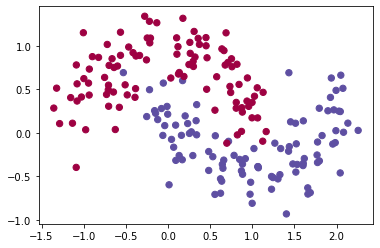

In [50]:
# Generate a dataset and plot it
np.random.seed(0) # 일관된 출력을 위해 유사난수 초기화
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

* 생성한 데이터 집합에는 빨간색 점과 파란색 점으로 표시된 두가지 클래스가 존재.
* 파란색 점은 남성 환자, 빨간색 점은 여성 환자, X축과 Y축은 의료 측정값

### Logistic Regression

Text(0.5, 1.0, 'Logistic Regression')

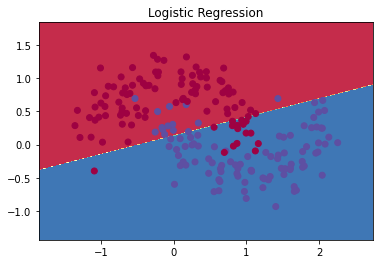

In [51]:
# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

def plot_decision_boundary(pred_func):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title('Logistic Regression')

* 그래프는 로지스틱 회귀 분석 분류기에서 학습한 결정 경계를 보여줍니다. 직선으로 데이터를 최대한 분리하지만, 데이터의 "달 모양"을 캡처할 수는 없습니다.

### Training a Neural Network

* 입력계층의 노드 수는 데이터 차원에 따라 결정됨.
* 마찬가지로 출력 계층의 노드 수도 클래스 수에 따라 결정됨.

![](http://www.wildml.com/wp-content/uploads/2015/09/nn-from-scratch-3-layer-network-1024x693.png)

* 숨겨진 레이어의 노드수를 선택할 수 있음.
* 숨겨진 계층에 노드를 더 많이 넣을수록 더 복잡한 기능을 맞출 수 있음. 그러나, 네트워크 매개변수를 예측하고 학습하려면 더 많은 계산이 필요하고, 파라미터 수가 많을수록 데이터의 과대적합이 발생될 수 있음. 

### How our network makes predictions

![](http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++z_1+%26+%3D+xW_1+%2B+b_1+%5C%5C++a_1+%26+%3D+%5Ctanh%28z_1%29+%5C%5C++z_2+%26+%3D+a_1W_2+%2B+b_2+%5C%5C++a_2+%26+%3D+%5Chat%7By%7D+%3D+%5Cmathrm%7Bsoftmax%7D%28z_2%29++%5Cend%7Baligned%7D&bg=ffffff&fg=000&s=0)

* W1, b1, W2, b2는 훈련 데이터를 통해 배워야 하는 네트워크의 매개 변수

### Learning the Parameters

* 네트워크에 대한 매개 변수를 학습한다는 것은 교육 데이터의 오류를 최소화하는 매개 변수(W_1, b_1, W_2, b_2)를 찾는 것을 의미

![](http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++L%28y%2C%5Chat%7By%7D%29+%3D+-+%5Cfrac%7B1%7D%7BN%7D+%5Csum_%7Bn+%5Cin+N%7D+%5Csum_%7Bi+%5Cin+C%7D+y_%7Bn%2Ci%7D+%5Clog%5Chat%7By%7D_%7Bn%2Ci%7D++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0)

* 두 확률 분포 y(실제값)와 y hat(예측값)가 멀어질수록 손실은 더 커집니다. 손실을 최소화하는 매개변수를 찾아 훈련 데이터의 가능성을 극대화

* Backpropagation은 Neural Network를 학습시키기 위한 일반적인 알고리즘 중 하나
* 예측하고자 하는 target값과 실제 모델이 계산한 output이 얼마나 차이가 나는지 구한 후 그 오차값을 다시 뒤로 전파해 가면서 각 노드가 가지고 있는 변수들을 갱신하는 알고리즘

![](http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%26+%5Cdelta_3+%3D+%5Chat%7By%7D+-+y+%5C%5C++%26+%5Cdelta_2+%3D+%281+-+%5Ctanh%5E2+z_1%29+%5Ccirc+%5Cdelta_3W_2%5ET+%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_2%7D%7D+%3D+a_1%5ET+%5Cdelta_3+%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_2%7D%7D+%3D+%5Cdelta_3%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_1%7D%7D+%3D+x%5ET+%5Cdelta2%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_1%7D%7D+%3D+%5Cdelta2+%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0)

### Implementation - Gradient Descent

In [52]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [53]:
# 손실함수 구현
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [54]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [55]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
               print ('Loss after iteration %i: %f' %i, calculate_loss(model))    
    return model

### A network with a hidden layer of size 3

In [56]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title('Decision Boundary for hidden layer size 3')

NameError: name 'xrange' is not defined